In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar datos
df = pd.read_csv("winequality-red.csv")

In [3]:
# Explorar distribución de la calidad
print(df['quality'].value_counts().sort_index())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [4]:
# Separar características y variable objetivo
X = df.drop('quality', axis=1)
y = df['quality']

In [5]:
# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(
    max_depth=5,  # Controlar la profundidad para evitar overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [8]:
# Hacer predicciones
y_pred = model.predict(X_test)

In [11]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Exactitud (Accuracy): {accuracy:.2f}')
print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(class_report)

Exactitud (Accuracy): 0.59

Matriz de Confusión:
[[ 0  0  1  1  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0 96 36  4  0]
 [ 0  0 44 75  9  0]
 [ 0  0  2 20 18  0]
 [ 0  0  0  2  1  0]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.71      0.66       136
           6       0.56      0.59      0.57       128
           7       0.56      0.45      0.50        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.29      0.29      0.29       320
weighted avg       0.56      0.59      0.57       320



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


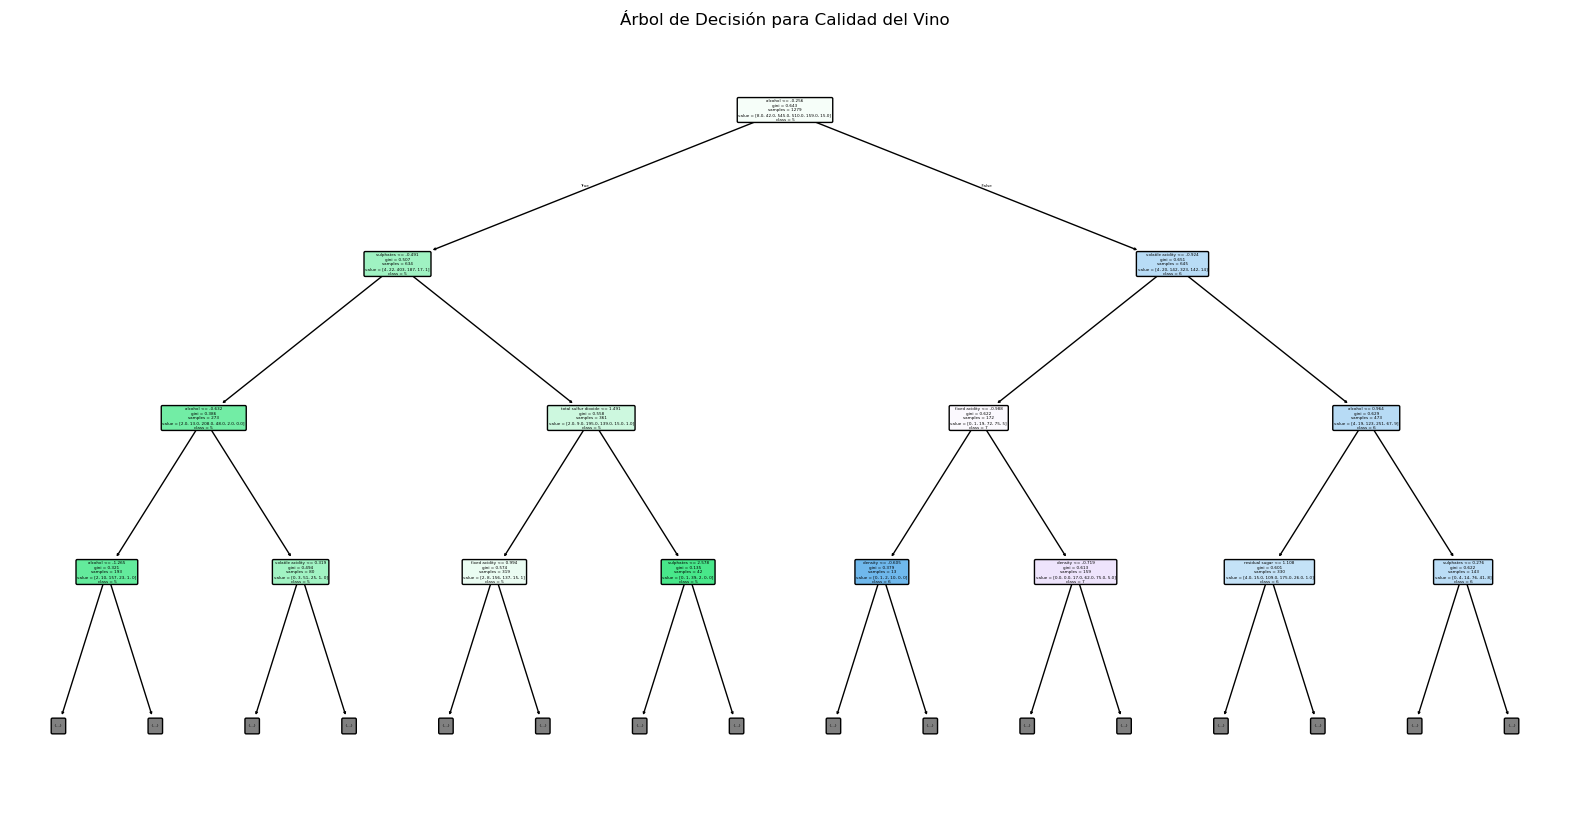

In [12]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=sorted(y.unique().astype(str)),
    filled=True,
    rounded=True,
    max_depth=3  # Mostrar solo primeros niveles para claridad
)
plt.title("Árbol de Decisión para Calidad del Vino")
plt.show()

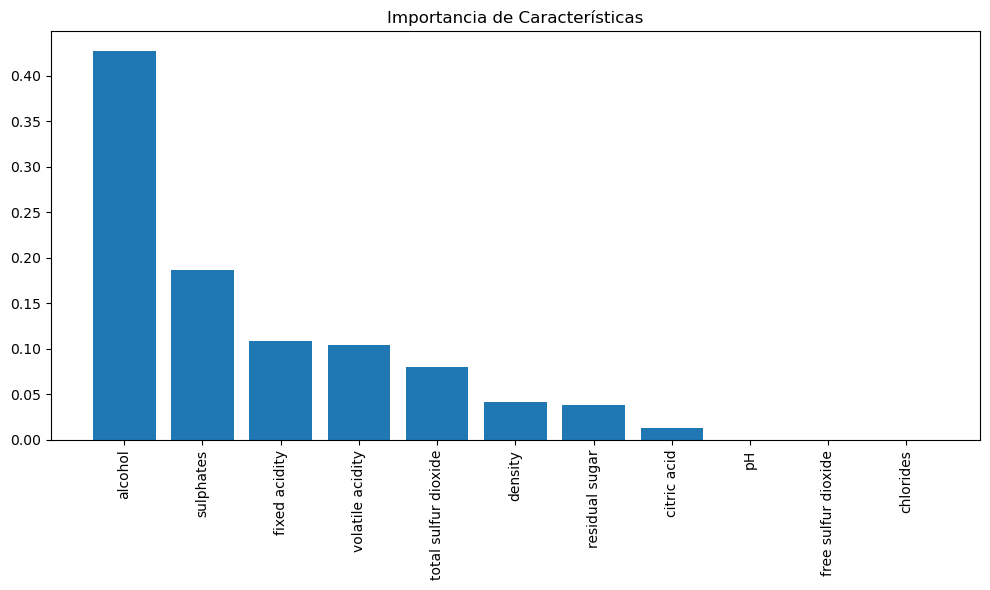

In [13]:
# Importancia de características
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de Características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()